In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv("/content/drive/MyDrive/CENG541ML/advertising.csv")

In [4]:
df.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [5]:
X=df[["TV"]]
y=df[["sales"]]

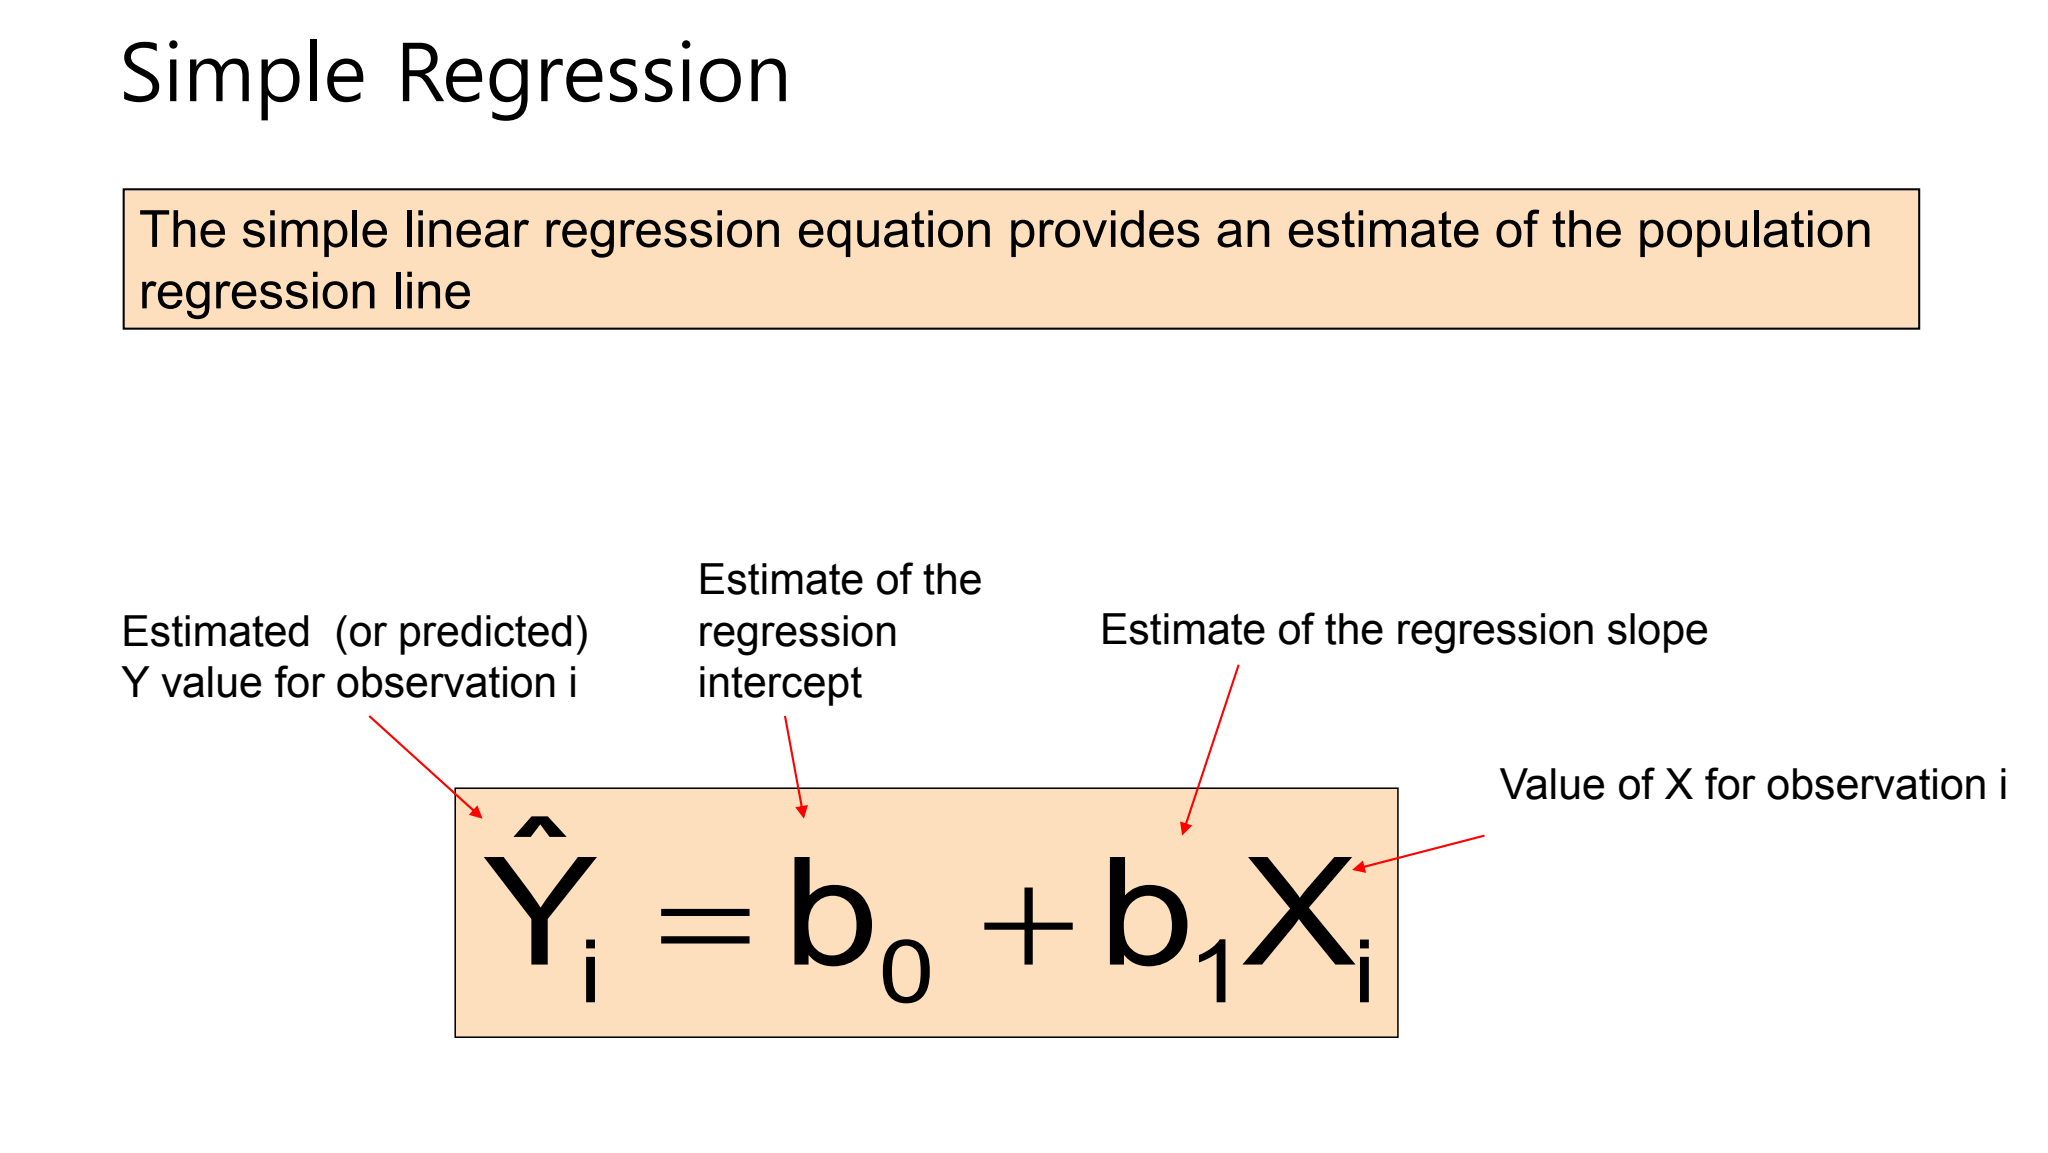

In [6]:
reg_model=LinearRegression().fit(X,y)

#y_hat=b0+b1*TV

In [7]:
reg_model.intercept_

array([7.03259355])

In [8]:
#b0=7.03

In [9]:
reg_model.coef_

array([[0.04753664]])

In [10]:
# y_hat=7.03+0.047*X      X=TV value

In [11]:
reg_model.intercept_[0]+reg_model.coef_[0][0]*150

14.163089614080658

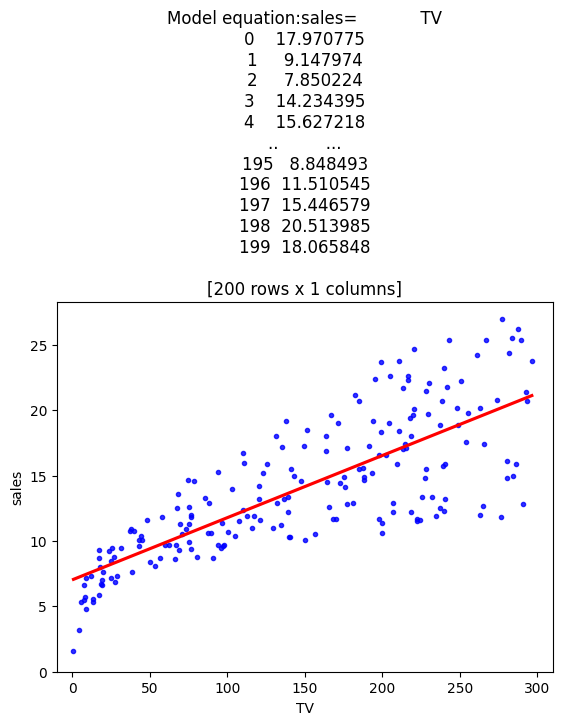

In [14]:
g=sns.regplot(x=X,y=y, scatter_kws={"color":"b","s":9},ci=False, color="r")
g.set_title(f"Model equation:sales={reg_model.intercept_[0]+X*reg_model.coef_[0][0]}")
g.set_ylabel("sales")
g.set_xlabel("TV")
plt.xlim(-10,310)
plt.ylim(bottom=0)
plt.show()

In [15]:
y_pred=reg_model.predict(X)

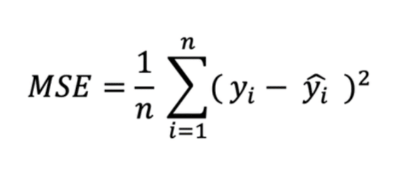

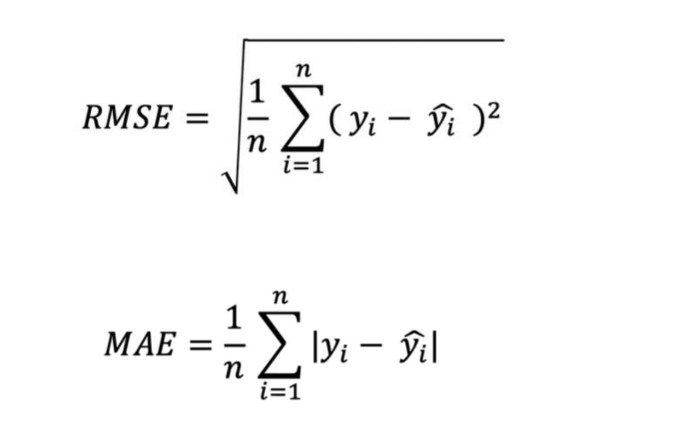

In [16]:
#y_pred = y_hat

mean_squared_error(y,y_pred)

10.512652915656757

In [17]:
#RMSE
np.sqrt(mean_squared_error(y,y_pred))

3.2423221486546887

In [18]:
#MAE
mean_absolute_error(y,y_pred)

2.549806038927486

**Cost Function and Gradient Descent Algorithm**

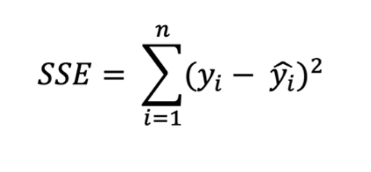

**Cost function**

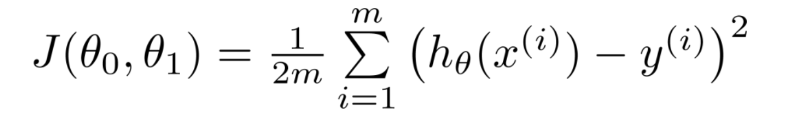



*   b0=b
*   b1=w



In [22]:
# Cost function
def cost_function(Y, b, w, X):
    m = len(Y)
    sse = 0

    for i in range(0, m):
        y_hat = b + w * X[i]
        y = Y[i]
        sse += (y_hat - y) ** 2

    cost = sse /(2* m)
    return cost

**Gradient Descent Algorithm**

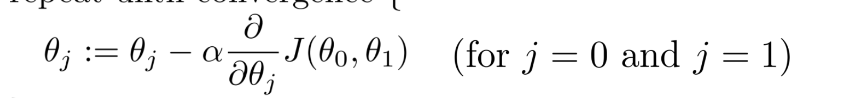

In [24]:
# update_weights
def update_weights(Y, b, w, X, learning_rate):
    m = len(Y)
    b_deriv_sum = 0
    w_deriv_sum = 0
    for i in range(0, m):
        y_hat = b + w * X[i]
        y = Y[i]
        b_deriv_sum += (y_hat - y)
        w_deriv_sum += (y_hat - y) * X[i]
    new_b = b - (learning_rate *( 1 / m) * b_deriv_sum)
    new_w = w - (learning_rate * (1 / m )* w_deriv_sum)
    return new_b, new_w



In [25]:

def train(Y, initial_b, initial_w, X, learning_rate, num_iters):

    print("Starting gradient descent at b = {0}, w = {1}, cost = {2}".format(initial_b, initial_w,
                                                                   cost_function(Y, initial_b, initial_w, X)))

    b = initial_b
    w = initial_w
    cost_history = []

    for i in range(num_iters):
        b, w = update_weights(Y, b, w, X, learning_rate)
        cost = cost_function(Y, b, w, X)
        cost_history.append(cost)


        if i % 100 == 0:
            print("iter={:d}    b={:.2f}    w={:.4f}    cost={:.4}".format(i, b, w, cost))


    print("After {0} iterations b = {1}, w = {2}, cost = {3}".format(num_iters, b, w, cost_function(Y, b, w, X)))
    return cost_history, b, w


In [26]:
df=pd.read_csv("/content/drive/MyDrive/CENG541ML/advertising.csv")

X = df["radio"]
Y = df["sales"]

# hyperparameters
learning_rate = 0.001
initial_b = 0.001
initial_w = 0.001
num_iters = 10000

cost_history, b, w = train(Y, initial_b, initial_w, X, learning_rate, num_iters)

Starting gradient descent at b = 0.001, w = 0.001, cost = 111.47387458365004
iter=0    b=0.01    w=0.3708    cost=26.63
iter=100    b=0.28    w=0.4788    cost=20.8
iter=200    b=0.54    w=0.4709    cost=20.14
iter=300    b=0.79    w=0.4633    cost=19.52
iter=400    b=1.03    w=0.4559    cost=18.93
iter=500    b=1.27    w=0.4487    cost=18.38
iter=600    b=1.49    w=0.4417    cost=17.86
iter=700    b=1.72    w=0.4349    cost=17.36
iter=800    b=1.93    w=0.4283    cost=16.9
iter=900    b=2.14    w=0.4219    cost=16.46
iter=1000    b=2.35    w=0.4157    cost=16.04
iter=1100    b=2.54    w=0.4096    cost=15.65
iter=1200    b=2.74    w=0.4037    cost=15.28
iter=1300    b=2.92    w=0.3980    cost=14.93
iter=1400    b=3.10    w=0.3925    cost=14.6
iter=1500    b=3.28    w=0.3871    cost=14.29
iter=1600    b=3.45    w=0.3818    cost=14.0
iter=1700    b=3.62    w=0.3767    cost=13.72
iter=1800    b=3.78    w=0.3718    cost=13.46
iter=1900    b=3.94    w=0.3670    cost=13.21
iter=2000    b=4.09

**Multiple Linear Regression**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/DATA_MINING/advertising.csv")

In [ ]:
y=df["sales"]
X=df.drop(["sales"], axis=1)

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.20, random_state=1)

In [ ]:
reg_model=LinearRegression().fit(X_train, y_train)

In [ ]:
reg_model.intercept_

2.907947020816433

In [ ]:
reg_model.coef_

array([0.0468431 , 0.17854434, 0.00258619])

In [ ]:
y_pred=reg_model.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_pred)

1.9918855518287906

In [ ]:
mean_absolute_error(y_test,y_pred)

1.0402154012924718

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

1.4113417558581587

**KNN Regressor**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DATA_MINING/advertising.csv")

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
df.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [ ]:
y=df["sales"]
X=df.drop(["sales"], axis=1)
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.20, random_state=1)

In [ ]:
knn_model=KNeighborsRegressor().fit(X_train, y_train)

In [ ]:
knn_model.n_neighbors

5

In [ ]:
knn_model.metric

'minkowski'

In [ ]:
y_pred=knn_model.predict(X_test)

In [ ]:
mean_squared_error(y_test,y_pred)

2.580140000000001

In [ ]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

1.6062814199261601

In [ ]:
RMSE=[]

for k in range(10):
  k=k+1
  knn_model=KNeighborsRegressor(n_neighbors= k).fit(X_train,y_train)
  y_pred=knn_model.predict(X_test)
  rmse=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSE.append(rmse)
  print("k=",k, "RMSE:", rmse)

k= 1 RMSE: 1.8617196351760381
k= 2 RMSE: 1.3802400153596475
k= 3 RMSE: 1.3225606476327152
k= 4 RMSE: 1.519940377120103
k= 5 RMSE: 1.6062814199261601
k= 6 RMSE: 1.6890188637851926
k= 7 RMSE: 1.6990948971107398
k= 8 RMSE: 1.7271431433149949
k= 9 RMSE: 1.7774548317783903
k= 10 RMSE: 1.8807113016090484


In [ ]:
RMSE=[]
distance=["minkowski", "euclidean", "manhattan", "hamming", "cosine"]

for i in distance:
  knn_model=KNeighborsRegressor(metric= i).fit(X_train,y_train)
  y_pred=knn_model.predict(X_test)
  rmse=np.sqrt(mean_squared_error(y_test,y_pred))
  RMSE.append(rmse)
  print("metric=",i, "RMSE:", rmse)

metric= minkowski RMSE: 1.6062814199261601
metric= euclidean RMSE: 1.6062814199261601
metric= manhattan RMSE: 1.5480536166425245
metric= hamming RMSE: 9.74007032828819
metric= cosine RMSE: 3.3764996668147322


**SVM regressor**

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DATA_MINING/advertising.csv")

In [ ]:
y=df["sales"]
X=df.drop(["sales"], axis=1)
X_train,X_test,y_train,y_test= train_test_split(X,y, test_size=0.20, random_state=1)

In [ ]:
from sklearn.svm import SVR

In [ ]:
svm_model=SVR().fit(X_train,y_train)

In [ ]:
y_pred=svm_model.predict(X_test)

In [ ]:
#RMSE
np.sqrt(mean_squared_error(y_test,y_pred))

1.9679208568763071